# Visualising Simulation Model

In [1]:
import fineng_irfx as fe
import matplotlib.pyplot as plt
import numpy as np
import math

## Box Muller

In [2]:
BM = fe.L4_BoxMuller(1)

In [3]:
N = 10000

std_norms = []
for i in range(N):
    std_norms.append(BM.Gauss())

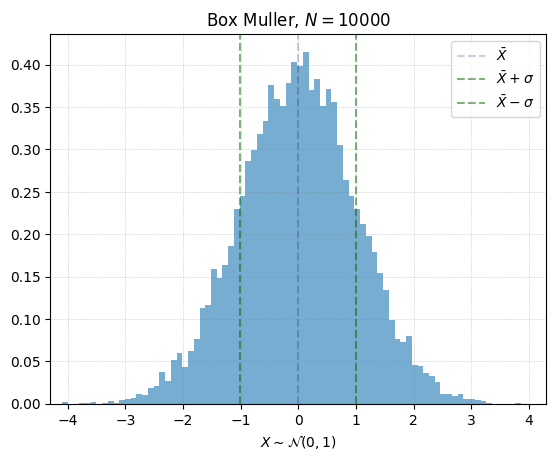

In [4]:
mean = np.mean(std_norms, axis=0)
std_dev = np.std(std_norms, axis=0)

plt.figure()
plt.title(fr"Box Muller, $N=${N}")
plt.hist(std_norms, bins=80, alpha=0.6, density=True)
plt.axvline(
    x=mean, color="darkblue", linestyle="--", label=r"$\bar{X}$", alpha=0.2, linewidth=1.5
)
plt.axvline(
    x=mean + std_dev, color="darkgreen", linestyle="--", label=r"$\bar{X} + \sigma$", alpha=0.5, linewidth=1.5
)
plt.axvline(
    x=mean - std_dev, color="darkgreen", linestyle="--", label=r"$\bar{X} - \sigma$", alpha=0.5, linewidth=1.5
)
plt.xlabel(r"$X \sim \mathcal{N}(0,1)$")
plt.grid(color="grey", linewidth=0.4, linestyle="--", alpha=0.4)
plt.xlim([-4.3,4.3])
plt.legend()
plt.show()

## Black Scholes Model

### Plotting paths

In [5]:
S0 = 100.0
r = 0.05
sigma = 0.3

T = 5.0
m = 100 # number of steps

path_count = 60

In [6]:
BSModel = fe.L4_BSModel(S0, r, sigma, BM)

path = [0] * m
simulated_paths = []
for i in range(path_count):
    simulated_paths.append(BSModel.GenerateSamplePath(T, m, path))

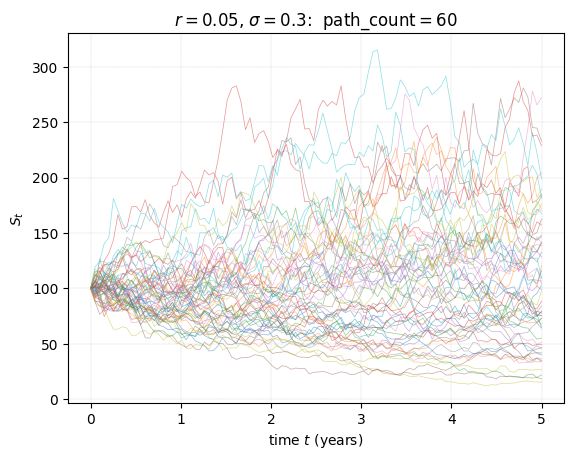

In [7]:
time_axis = np.linspace(0, T, m)

plt.figure()
plt.title(fr"$r={r}$, $\sigma={sigma}$:  path_count$=${path_count}")
for path in simulated_paths:
    plt.plot(time_axis, path, alpha=0.5, linewidth=0.5)
plt.ylabel(r"$S_t$")
plt.xlabel(r"time $t$ (years)")
plt.grid(color="grey", linewidth=0.3, linestyle="--", alpha=0.4)
plt.show()

### plotting distribution

In [8]:
def get_terminal_values(T, path_count, S0, r, sigma, RNG):
    BSModel = fe.L4_BSModel(S0, r, sigma, RNG)
    S_T = []
    for i in range(path_count):
        S_T.append(BSModel.GenerateSamplePath(T, m, path)[-1])
    return S_T

def gbm_density(x, S0, sigma, mu, t):
    norm = 1./ (np.sqrt(2*math.pi*t)*sigma*x)
    drift = (mu-0.5*sigma**2)*t
    return norm* np.exp(-(np.log(x)-np.log(S0)-drift)**2/(2*sigma**2*t))

def plot_distribution(S_T, r, sigma, T, S0):
    mean = np.mean(S_T, axis=0)
    std_dev = np.std(S_T, axis=0)
    path_count = len(S_T)
    
    plt.figure()
    plt.title(fr"$S_0={S0}$, $r={r}$, $\sigma={sigma}$, $T={T}$:  path_count$=${path_count}")
    plt.hist(S_T, bins=100, alpha=0.5, density=True)
    plt.axvline(
        x=mean, color="red", linestyle="--", label=r"$\bar{S_T}$", alpha=0.4, lw=1.5
    )
    plt.axvline(
        x=mean + std_dev, color="darkgreen", linestyle="--", label=r"$\bar{S_T} + \hat{\sigma}$", alpha=0.4, lw=1.5
    )
    plt.axvline(
        x=mean - std_dev, color="darkgreen", linestyle="--", label=r"$\bar{S_T} - \hat{\sigma}$", alpha=0.4, lw=1.5
    )
    x = np.linspace(1e-2, mean+4*std_dev, 1000)
    pdf = gbm_density(x, S0, sigma, r, T)
    plt.plot(x, pdf, color="darkorange", alpha=0.5, lw=1.5, label='log-normal pdf')
    plt.xlabel(r"$S_T$")
    plt.grid(color="grey", linewidth=0.4, linestyle="--", alpha=0.4)
    plt.xlim(0,mean+4*std_dev)
    plt.legend()
    plt.show()

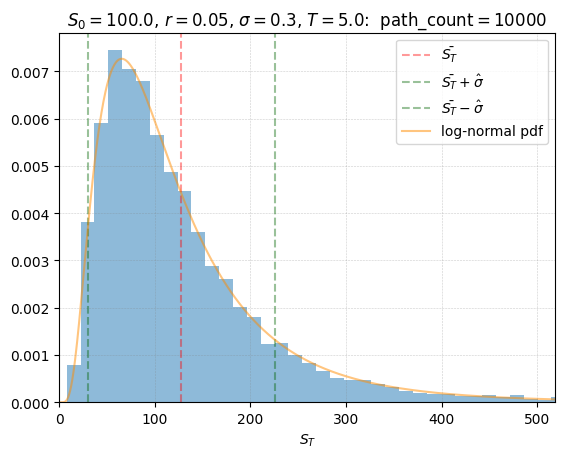

In [9]:
path_count = 10000
T = 5.0

S0 = 100.0
r = 0.05
sigma = 0.3

S_T = get_terminal_values(T, path_count, S0, r, sigma, BM)
plot_distribution(S_T, r, sigma, T, S0)

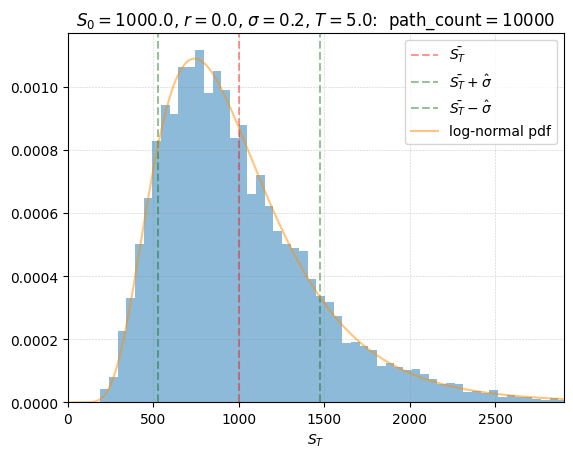

In [10]:
path_count = 10000
T = 5.0

S0 = 1000.0
r = 0.0
sigma = 0.2

S_T = get_terminal_values(T, path_count, S0, r, sigma, BM)
plot_distribution(S_T, r, sigma, T, S0)

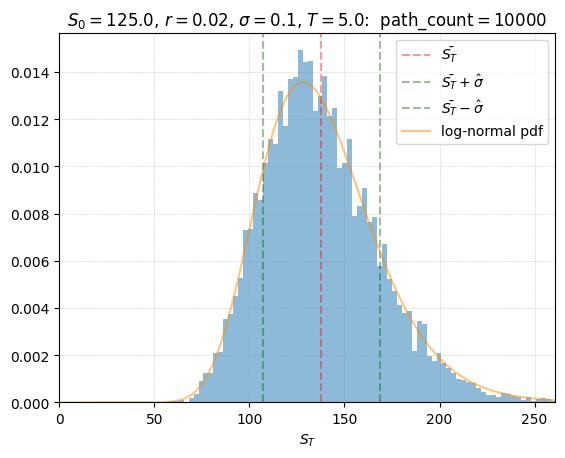

In [11]:
path_count = 10000
T = 5.0

S0 = 125.0
r = 0.02
sigma = 0.1

S_T = get_terminal_values(T, path_count, S0, r, sigma, BM)
plot_distribution(S_T, r, sigma, T, S0)